In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib widget
plt.close('all')
import numpy as np
from sklearn.preprocessing import StandardScaler
from random import choice
import imageio
import os
import cv2
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

path_save = r"C:\Users\coren\Dropbox\Apps\Snellius2\data_tables\time_plate_infos_agg.pick"

time_plate_info = pd.read_pickle(path_save)
plt.style.use('presentation.mplstyle')

In [2]:
import matplotlib as mpl
cmap1 = mpl.cm.get_cmap('spring')
cmap2 = mpl.cm.get_cmap('winter')

NameError: name 'table' is not defined

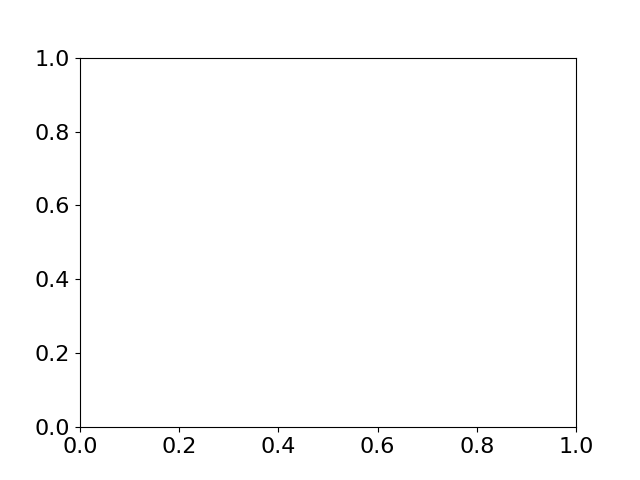

In [3]:
fig, ax = plt.subplots()
table = table.loc[table['out_study']==False]
ax.plot(table['time_since_begin'],table['tot_length_study'])
ax.set_yscale("log")

In [5]:
def S(t,lamb,C,t0):
    return(C*(1/(1+np.exp(lamb*(t0-t)))))

[ 6.82516563e-02  6.59664389e+03 -6.14199453e+00]
[ 6.54083441e-02  7.43349767e+03 -7.65658049e+00]
[ 6.75211104e-02  7.30541686e+03 -1.03145675e+00]
[ 5.75940326e-02  7.75801624e+03 -2.13045971e+00]
[ 6.40880090e-02  6.40111166e+03 -8.40492571e+00]
[ 6.47069266e-02  7.27728486e+03 -7.89043296e+00]
[ 6.98165513e-02  5.91175378e+03 -1.18401091e+01]
[ 7.38993794e-02  5.60266280e+03 -1.35011515e+01]
[ 7.95353586e-02  5.99341978e+03 -1.00718925e+01]


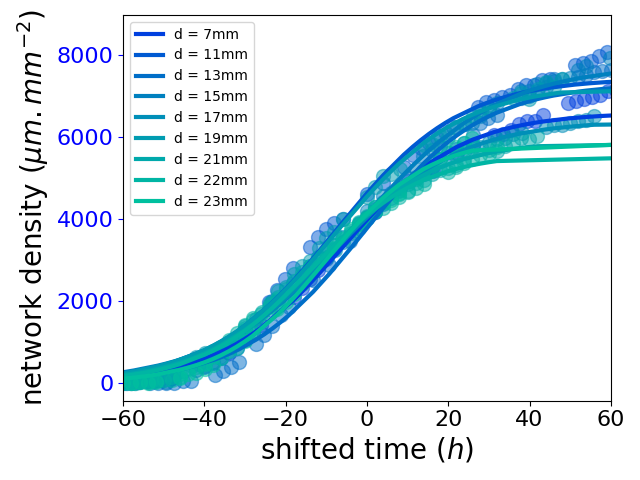

In [6]:
plt.close('all')
plate = 737
fig, ax = plt.subplots()

# ax2 = ax.twinx()
maxi = 10
table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
table= table.set_index('t')
max_area = 40
ts = []
ys = []
ys2 = []
indexes = list(range(1,maxi))
# indexes = [1,2]
Cs = []
lambs = [] 
limitt = 245
for index in indexes:
    column = f"ring_density_incr-100_index-{index}"
#     column2 = f"ring_active_tips_density_incr-100_index-{index}"
    start = np.min(table.loc[table[column]>=4000]['time_since_begin'])
    if not np.isnan(start):
        table[f'time_since_begin_{index}']=table['time_since_begin']-start
        area = np.sqrt(table["area_sep_comp"][0]+100*index)

        ax.scatter(table[f'time_since_begin_{index}'],table[column],alpha=0.5,color=cmap2(area/max_area))
#         ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.5,color=cmap1(area/max_area))
        selection_fit = table.loc[(table[f'time_since_begin_{index}'].between(-50,50))&(table['time_since_begin']<=limitt)]
        popt0, pcov = curve_fit(S, selection_fit[f'time_since_begin_{index}'],selection_fit[column] ,bounds = ([0,0,-np.inf],3*[np.inf]),p0=[ 6.82516702e-02, 6.59664366e+03, -6.14199512e+00])
        print(popt0)
        lamb,C,t0 = list(popt0)
        Cs.append(C)
        lambs.append(lamb)
        ax.plot(table[f'time_since_begin_{index}'],S(table[f'time_since_begin_{index}'],lamb,C,t0),color=cmap2(area/max_area),label=f'd = {int(area/np.sqrt((np.pi/2)))}mm')
        ts +=table[f'time_since_begin_{index}'].to_list()
        ys += table[column].to_list()
#         ys2+=table[column2].astype(float).to_list()
df = pd.DataFrame((np.array((ts,ys))).transpose(),columns=('ts','ys'))
factor = 4
df['ts_round'] = (df['ts']/factor).astype(int)*factor
meancurve = df.groupby('ts_round')['ys'].mean()
# ax.plot(meancurve.index,meancurve,color="blue",linewidth = 5)
# meancurve2 = df.groupby('ts_round')['ys2'].mean()
# ax2.plot(meancurve.index,meancurve2,color="red",linewidth = 5)
# ax2.set_color('red')
ax.set_xlim((-60,60))
ax.set_ylabel('network density ($\mu m.mm^{-2}$)')
ax.set_xlabel('shifted time ($h$)')
# ax2.set_ylabel('active tips density ($mm^{-2}$)')
ax.tick_params(axis='y', colors='blue')
# ax2.tick_params(axis='y', colors='red')
ax.legend()
plt.tight_layout()
plt.savefig("Figure/dynamic_single_point_agg.svg")

[ 6.82516563e-02  6.59664389e+03 -6.14199453e+00]
[ 6.54083441e-02  7.43349767e+03 -7.65658049e+00]
[ 6.75211104e-02  7.30541686e+03 -1.03145675e+00]
[ 5.75940326e-02  7.75801624e+03 -2.13045971e+00]
[ 6.40880090e-02  6.40111166e+03 -8.40492571e+00]
[ 6.47069266e-02  7.27728486e+03 -7.89043296e+00]
[ 6.98165513e-02  5.91175378e+03 -1.18401091e+01]
[ 7.38993794e-02  5.60266280e+03 -1.35011515e+01]
[ 7.95353586e-02  5.99341978e+03 -1.00718925e+01]


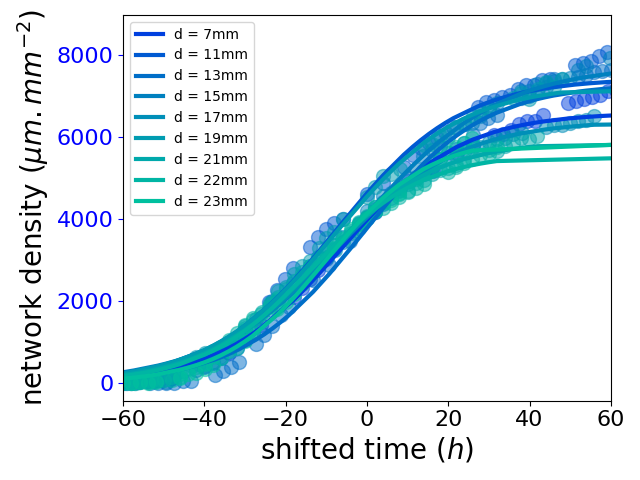

In [6]:
plt.close('all')
plate = 737
fig, ax = plt.subplots()

# ax2 = ax.twinx()
maxi = 10
table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
table= table.set_index('t')
max_area = 40
ts = []
ys = []
ys2 = []
indexes = list(range(1,maxi))
# indexes = [1,2]
Cs = []
lambs = [] 
t0s = []
ds = []
limitt = 245
for index in indexes:
    column = f"ring_density_incr-100_index-{index}"
#     column2 = f"ring_active_tips_density_incr-100_index-{index}"
    start = np.min(table.loc[table[column]>=4000]['time_since_begin'])
    if not np.isnan(start):
        table[f'time_since_begin_{index}']=table['time_since_begin']-start
        area = np.sqrt(table["area_sep_comp"][0]+100*index)

        ax.scatter(table[f'time_since_begin_{index}'],table[column],alpha=0.5,color=cmap2(area/max_area))
#         ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.5,color=cmap1(area/max_area))
        selection_fit = table.loc[(table[f'time_since_begin_{index}'].between(-50,50))&(table['time_since_begin']<=limitt)]
        popt0, pcov = curve_fit(S, selection_fit[f'time_since_begin_{index}'],selection_fit[column] ,bounds = ([0,0,-np.inf],3*[np.inf]),p0=[ 6.82516702e-02, 6.59664366e+03, -6.14199512e+00])
        print(popt0)
        lamb,C,t0 = list(popt0)
        Cs.append(C)
        lambs.append(lamb)
        t0s.append(t0+start)
        ds.append(int(area/np.sqrt((np.pi/2))))
        ax.plot(table[f'time_since_begin_{index}'],S(table[f'time_since_begin_{index}'],lamb,C,t0),color=cmap2(area/max_area),label=f'd = {int(area/np.sqrt((np.pi/2)))}mm')
        ts +=table[f'time_since_begin_{index}'].to_list()
        ys += table[column].to_list()
#         ys2+=table[column2].astype(float).to_list()
df = pd.DataFrame((np.array((ts,ys))).transpose(),columns=('ts','ys'))
factor = 4
df['ts_round'] = (df['ts']/factor).astype(int)*factor
meancurve = df.groupby('ts_round')['ys'].mean()
# ax.plot(meancurve.index,meancurve,color="blue",linewidth = 5)
# meancurve2 = df.groupby('ts_round')['ys2'].mean()
# ax2.plot(meancurve.index,meancurve2,color="red",linewidth = 5)
# ax2.set_color('red')
ax.set_xlim((-60,60))
ax.set_ylabel('network density ($\mu m.mm^{-2}$)')
ax.set_xlabel('shifted time ($h$)')
# ax2.set_ylabel('active tips density ($mm^{-2}$)')
ax.tick_params(axis='y', colors='blue')
# ax2.tick_params(axis='y', colors='red')
ax.legend()
plt.tight_layout()
plt.savefig("Figure/dynamic_single_point_agg.svg")

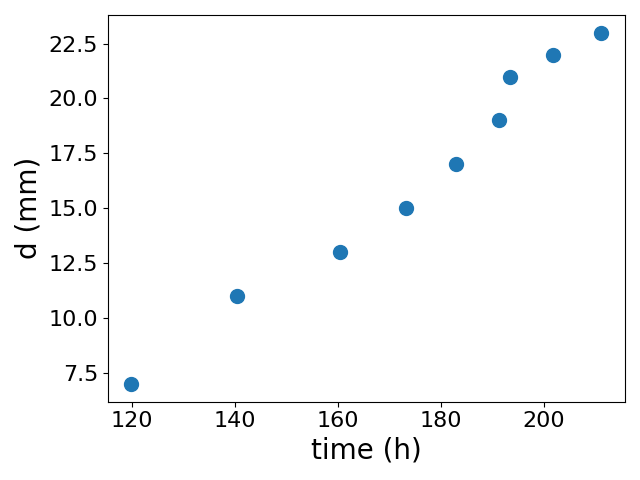

In [7]:
fig, ax = plt.subplots()
ax.scatter(t0s,ds)
ax.set_xlabel('time (h)')
ax.set_ylabel('d (mm)')
plt.tight_layout()

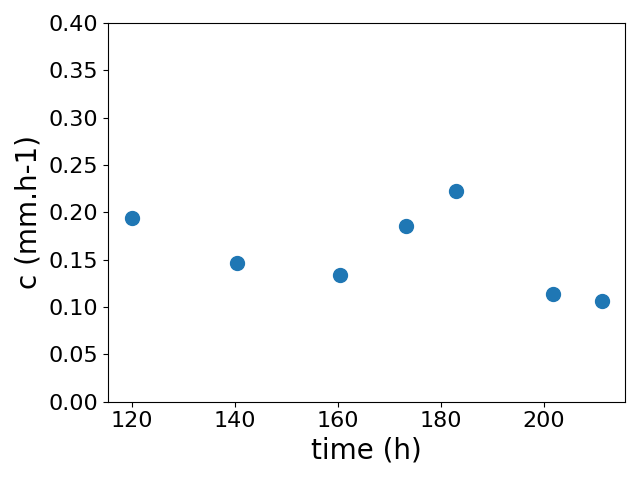

In [8]:
fig, ax = plt.subplots()
vs = np.gradient(ds,t0s)
ax.scatter(t0s,vs)
ax.set_xlabel('time (h)')
ax.set_ylabel('c (mm.h-1)')
ax.set_ylim((0,0.4))
plt.tight_layout()

In [47]:
fig, ax = plt.subplots()
data = pd.DataFrame(np.array((indexes,lambs,Cs,plates)).transpose(),columns=('index','lamb','C',"plate"))
y = 'C'
data = data.loc[data[y]<10000]
data.groupby('index')[y].mean()
group = data.groupby('index')[y]
ax.plot(group.mean()) 

ax.scatter(data["index"],data[y],alpha = 0.5,color = [colors[plate] for plate in data['plate']])
ax.errorbar(group.mean().index,group.mean(),group.std()/np.sqrt(group.count()))
ax.set_xlabel("ring index")
ax.set_ylabel("$C (\mu m.mm{-2})$")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\Users\coren\anaconda3\envs\cleanMsc\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, '$C (\\mu m.mm{-2})$')

In [44]:
cmap3 = mpl.cm.get_cmap('jet')
colors = {plate : cmap3(np.random.random()) for plate in plates}
plates = [737]*len(indexes)
fig, ax = plt.subplots()
data = pd.DataFrame(np.array((indexes,lambs,plates)).transpose(),columns=('index','lamb',"plate"))
data = data.loc[data['lamb']<1]
data.groupby('index')['lamb'].mean()
group = data.groupby('index')['lamb']
ax.plot(group.mean()) 

ax.scatter(data['index'],data['lamb'],alpha = 0.5,color = [colors[plate] for plate in data['plate']])
ax.errorbar(group.mean().index,group.mean(),group.std()/np.sqrt(group.count()))
ax.set_xlabel("ring index")
ax.set_ylabel("$\lambda (h^{-1})$")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\Users\coren\anaconda3\envs\cleanMsc\lib\site-packages\numpy\core\_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, '$\\lambda (h^{-1})$')

In [17]:
selection_fit[column]
popt0, pcov = curve_fit(S, selection_fit[f'time_since_begin_{index}'],selection_fit[column] ,bounds = ([0,0,-np.inf],3*[np.inf]),p0=[ 6.82516702e-02, 6.59664366e+03, -6.14199512e+00])

In [34]:
selection_fit[[f'time_since_begin_{index}',column]]


,time_since_begin_9,ring_density_incr-100_index-9
t,,
70,-45.933333,130.188485
71,-43.933333,218.111516
72,-41.933333,252.430145
73,-39.933333,344.80965
74,-37.933333,442.865721
75,-35.933333,616.822239
76,-33.933333,786.006295
77,-32.016667,859.52603
78,-30.033333,1024.404125


In [30]:
table.loc[table[f'time_since_begin_{index}']<=80][['time_since_begin',f'time_since_begin_{index}',column]]

,time_since_begin,time_since_begin_11,ring_density_incr-100_index-11
t,,,
0,0.000000,-239.250000,0.0
1,2.016667,-237.233333,0.0
2,4.016667,-235.233333,0.0
3,6.016667,-233.233333,0.0
4,8.016667,-231.233333,0.0
...,...,...,...
96,239.250000,0.000000,4064.086862
97,241.250000,2.000000,4203.22358
98,243.250000,4.000000,4350.914031


In [25]:
a,b,c

(20.87246335219542, 518.5017842381932, 13.225449215990242)

In [55]:
plt.close('all')
plate = 152
fig, ax = plt.subplots()

ax2 = ax.twinx()
maxi = 12
for plate in [94,152,792,799,800,91]:
    table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
    table= table.set_index('t')
    
    ts = []
    ys = []
    ys2 = []
    for index in range(1,maxi):
        column = f"ring_density_incr-100_index-{index}"
        column2 = f"ring_active_tips_density_incr-100_index-{index}"
        start = np.min(table.loc[table[column]>=1000]['time_since_begin'])
        if not np.isnan(start):
            table[f'time_since_begin_{index}']=table['time_since_begin']-start
            area = np.sqrt(table["area_sep_comp"][0]+100*index)
            
            ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.5,color=cmap2(area/max_area))
            ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.5,color=cmap1(area/max_area))

            ts +=table[f'time_since_begin_{index}'].to_list()
            ys += table[column].to_list()
            ys2+=table[column2].astype(float).to_list()
df = pd.DataFrame((np.array((ts,ys,ys2))).transpose(),columns=('ts','ys','ys2'))
factor = 4
df['ts_round'] = (df['ts']/factor).astype(int)*factor
meancurve = df.groupby('ts_round')['ys'].mean()
# ax.plot(meancurve.index,meancurve,color="blue",linewidth = 5)
meancurve2 = df.groupby('ts_round')['ys2'].mean()
# ax2.plot(meancurve.index,meancurve2,color="red",linewidth = 5)
# ax2.set_color('red')
ax.set_xlim((-30,30))
ax.set_ylabel('network density ($\mu m.mm^{-2}$)')
ax.set_xlabel('shifted time ($h$)')
ax2.set_ylabel('active tips density ($mm^{-2}$)')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [48]:
# table= table.set_index('t')
table["area_sep_comp"][99]

2434.240976262188

In [33]:
plt.close('all')
plate = 94
table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
fig, ax = plt.subplots()
ts = []
ys = []
ys2 = []
ax2 = ax.twinx()

for index in range(20):
    column = f"ring_density_incr-100_index-{index}"
    column2 = f"ring_bas_density_incr-100_index-{index}"
    start = np.min(table.loc[table[column]>=1000]['time_since_begin'])
    if not np.isnan(start):
        table[f'time_since_begin_{index}']=table['time_since_begin']-start
        ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.2,color='blue')
        ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.2,color='red')

        ts +=table[f'time_since_begin_{index}'].to_list()
        ys += table[column].to_list()
        ys2+=table[column2].astype(float).to_list()
df = pd.DataFrame((np.array((ts,ys,ys2))).transpose(),columns=('ts','ys','ys2'))
factor = 4
df['ts_round'] = (df['ts']/factor).astype(int)*factor
meancurve = df.groupby('ts_round')['ys'].mean()
ax.plot(meancurve.index,meancurve,color="blue",linewidth = 5)
meancurve2 = df.groupby('ts_round')['ys2'].mean()
ax2.plot(meancurve.index,meancurve2,color="red",linewidth = 5)
# ax2.set_color('red')
ax.set_xlim((-30,30))
ax2.set_ylim((-25,650))
ax.set_ylabel('network density ($\mu m.mm^{-2}$)')
ax.set_xlabel('shifted time ($h$)')
ax2.set_ylabel('bas density ($\mu m.mm^{-2}$)')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [82]:
plt.close('all')
plate = 94
table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
fig, ax = plt.subplots()
ts = []
ys = []
ys2 = []
ax2 = ax.twinx()

for index in range(20):
    column = f"ring_branch_density_incr-100_index-{index}"
    column2 = f"ring_active_tips_density_incr-100_index-{index}"
    start = np.min(table.loc[table[f"ring_density_incr-100_index-{index}"]>=1000]['time_since_begin'])
    if not np.isnan(start):
        table[f'time_since_begin_{index}']=table['time_since_begin']-start
        ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.2,color='blue')
        ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.2,color='red')

        ts +=table[f'time_since_begin_{index}'].to_list()
        ys += table[column].astype(float).to_list()
        ys2+=table[column2].astype(float).to_list()
df = pd.DataFrame((np.array((ts,ys,ys2))).transpose(),columns=('ts','ys','ys2'))
factor = 4
df['ts_round'] = (df['ts']/factor).astype(int)*factor
meancurve = df.groupby('ts_round')['ys'].mean()
ax.plot(meancurve.index,meancurve,color="blue",linewidth = 5)
meancurve2 = df.groupby('ts_round')['ys2'].mean()
ax2.plot(meancurve.index,meancurve2,color="red",linewidth = 5)
# ax2.set_color('red')
ax.set_xlim((-30,30))
ax.set_ylim((-0.00030,0.010))
ax.set_ylabel('new branch density ($mm^{-2}.h^{-1}$)')
ax.set_xlabel('shifted time ($h$)')
ax2.set_ylabel('active tips density ($mm^{-2}$)')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [67]:
plt.close('all')
plate = 94
table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
fig, ax = plt.subplots()
ts = []
ys = []
ys2 = []
ax2 = ax.twinx()

for index in range(20):
    column = f"ring_anas_density_incr-100_index-{index}"
    column2 = f"ring_active_tips_density_incr-100_index-{index}"
    start = np.min(table.loc[table[f"ring_density_incr-100_index-{index}"]>=1000]['time_since_begin'])
    if not np.isnan(start):
        table[f'time_since_begin_{index}']=table['time_since_begin']-start
        ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.2,color='blue')
        ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.2,color='red')

        ts +=table[f'time_since_begin_{index}'].to_list()
        ys += table[column].astype(float).to_list()
        ys2+=table[column2].astype(float).to_list()
df = pd.DataFrame((np.array((ts,ys,ys2))).transpose(),columns=('ts','ys','ys2'))
factor = 4
df['ts_round'] = (df['ts']/factor).astype(int)*factor
meancurve = df.groupby('ts_round')['ys'].mean()
ax.plot(meancurve.index,meancurve,color="blue",linewidth = 5)
meancurve2 = df.groupby('ts_round')['ys2'].mean()
ax2.plot(meancurve.index,meancurve2,color="red",linewidth = 5)
# ax2.set_color('red')
ax.set_xlim((-30,30))
ax.set_ylim((0,0.0020))
ax2.set_ylim((0,0.25))

ax.set_ylabel('anastomosis density ($mm^{-2}.h^{-1}$)')
ax.set_xlabel('shifted time ($h$)')
ax2.set_ylabel('active tips density ($mm^{-2}$')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
plt.close('all')
plate = 94
table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
fig, ax = plt.subplots()
ts = []
ys = []
ys2 = []
ax2 = ax.twinx()

for index in range(15):
    column = f"mean_speed_incr-100_index-{index}"
    column2 = f"ring_active_tips_density_incr-100_index-{index}"
    start = np.min(table.loc[table[f"ring_density_incr-100_index-{index}"]>=1000]['time_since_begin'])
    if not np.isnan(start):
        table[f'time_since_begin_{index}']=table['time_since_begin']-start
        table = table.loc[(table[column_speed]<=400) | (table[column_speed].isnull()==True)]
        
        ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.2,color='blue')
        ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.2,color='red')

        ts +=table[f'time_since_begin_{index}'].to_list()
        ys += table[column].astype(float).to_list()
        ys2+=table[column2].astype(float).to_list()
df = pd.DataFrame((np.array((ts,ys,ys2))).transpose(),columns=('ts','ys','ys2'))
factor = 4
df['ts_round'] = (df['ts']/factor).astype(int)*factor
meancurve = df.groupby('ts_round')['ys'].mean()
ax.plot(meancurve.index,meancurve,color="blue",linewidth = 5)
meancurve2 = df.groupby('ts_round')['ys2'].mean()
ax2.plot(meancurve.index,meancurve2,color="red",linewidth = 5)
# ax2.set_color('red')
ax.set_xlim((-30,30))
ax.set_ylim((100,350))
ax.set_ylabel('new branch density ($mm^{-2}.h{-1}$)')
ax.set_xlabel('shifted time ($h$)')
ax2.set_ylabel('active tips density ($mm^{-2}$)')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

NameError: name 'column_speed' is not defined

In [64]:
plt.close('all')
fig, ax = plt.subplots()

ax2 = ax.twinx()
for plate in [94,152,792,799,800,91]:
    table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
    ts = []
    ys = []
    ys2 = []


    for index in range(20):
        column = f"ring_density_incr-100_index-{index}"
        column2 = f"ring_active_tips_density_incr-100_index-{index}"
        start = np.min(table.loc[table[column]>=1000]['time_since_begin'])
        if not np.isnan(start):
            table[f'time_since_begin_{index}']=table['time_since_begin']-start
#             ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.2,color='blue')
#             ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.2,color='red')

            ts +=table[f'time_since_begin_{index}'].to_list()
            ys += table[column].to_list()
            ys2+=table[column2].astype(float).to_list()
    df = pd.DataFrame((np.array((ts,ys,ys2))).transpose(),columns=('ts','ys','ys2'))
    factor = 4
    df['ts_round'] = (df['ts']/factor).astype(int)*factor
    meancurve = df.groupby('ts_round')['ys'].mean()
    ax.plot(meancurve.index,meancurve,label=plate)
    meancurve2 = df.groupby('ts_round')['ys2'].mean()
    ax2.plot(meancurve.index,meancurve2,label=plate,linestyle="dashed")
# ax2.set_color('red')
ax.set_xlim((-30,30))
ax.set_ylabel('network density ($\mu m.mm^{-2}$)')
ax.set_xlabel('shifted time ($h$)')
ax2.set_ylabel('active tips density ($mm^{-2}$')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
plt.legend()
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [65]:
plt.close('all')
fig, ax = plt.subplots()

ax2 = ax.twinx()
for plate in [94,152,792,799,800,91]:
    table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
    ts = []
    ys = []
    ys2 = []


    for index in range(15):
        column3 = f"ring_density_incr-100_index-{index}"
        column2 = f"ring_active_tips_density_incr-100_index-{index}"
        start = np.min(table.loc[table[column3]>=1000]['time_since_begin'])
        column = f"mean_speed_incr-100_index-{index}"
        
        if not np.isnan(start):
            table[f'time_since_begin_{index}']=table['time_since_begin']-start
            table = table.loc[(table[column_speed]<=400) | (table[column_speed].isnull()==True)]
            
#             ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.2,color='blue')
#             ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.2,color='red')

            ts +=table[f'time_since_begin_{index}'].to_list()
            ys += table[column].astype(float).to_list()
            ys2+=table[column2].astype(float).to_list()
    df = pd.DataFrame((np.array((ts,ys,ys2))).transpose(),columns=('ts','ys','ys2'))
    factor = 4
    df['ts_round'] = (df['ts']/factor).astype(int)*factor
    meancurve = df.groupby('ts_round')['ys'].mean()
    ax.plot(meancurve.index,meancurve,label=plate)
    meancurve2 = df.groupby('ts_round')['ys2'].mean()
    ax2.plot(meancurve.index,meancurve2,label=plate,linestyle="dashed")
# ax2.set_color('red')
ax.set_xlim((-30,30))
ax.set_ylim((100,350))

ax.set_ylabel('mean speed ($\mu m.h^{-1}$)')
ax.set_xlabel('shifted time ($h$)')
ax2.set_ylabel('active tips density ($mm^{-2}$')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
plt.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

NameError: name 'column_speed' is not defined

In [62]:
plt.close('all')
fig, ax = plt.subplots()
tstot = []
ystot = []
ys2tot = []
ys3tot = []

ax2 = ax.twinx()
for plate in [94,152,792,799,800,91]:
    table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
    ts = []
    ys = []
    ys2 = []
    for index in range(20):
        column = f"ring_density_incr-100_index-{index}"
#         column = f"ring_active_tips_density_incr-100_index-{index}"
        
        column2 = f"ring_active_tips_density_incr-100_index-{index}"
        column3 = f"mean_speed_incr-100_index-{index}"

        align_col = f"ring_density_incr-100_index-{index}"
        start = np.min(table.loc[table[align_col]>=1000]['time_since_begin'])
        if not np.isnan(start):
            table[f'time_since_begin_{index}']=table['time_since_begin']-start
            table = table.loc[(table[column_speed]<=400) | (table[column_speed].isnull()==True)]
            
#             ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.2,color='blue')
#             ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.2,color='red')
            
            x = f'time_since_begin_{index}'
            deb = np.min(table[x])
            end = np.max(table[x])
            time = np.linspace(deb,end,1000)
            tstot +=list(time)
            f = interp1d(table[x], table[column])
            ystot += list(f(time))
            f = interp1d(table[x], table[column2])
            ys2tot+=list(f(time))
            f = interp1d(table[x], table[column3])
            ys3tot+=list(f(time))
df = pd.DataFrame((np.array((tstot,ystot,ys2tot,ys3tot))).transpose(),columns=('ts','ys','ys2','ys3'))
factor = 4
df['ts_round'] = np.floor(df['ts']/factor)*factor
meancurve = df.groupby('ts_round')['ys'].mean()
grad = np.gradient(meancurve,meancurve.index)

meancurve2 = df.groupby('ts_round')['ys2'].mean()
meancurve3 = df.groupby('ts_round')['ys3'].mean()
ax2.plot(meancurve3.index,meancurve3,linewidth = 5,color='red')

ax.plot(meancurve2.index,meancurve2*meancurve3,linewidth = 5)
ax2.set_ylim((140,250))

# ax2.set_color('red')
ax.set_xlim((-30,30))
ax.set_ylabel('n ($mm^{-2}$)')
ax.set_xlabel('shifted time ($h$)')
ax2.set_ylabel('v ($\mu m.h^{-1}$')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

NameError: name 'column_speed' is not defined

In [100]:
# plt.close('all')
# fig, ax = plt.subplots()
tstot = []
ystot = []
ys2tot = []
# ax2 = ax.twinx()
for plate in [94,152,792,799,800,91]:
    table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
    ts = []
    ys = []
    ys2 = []
    for index in range(20):
        column2 = f"mean_speed_incr-100_index-{index}"
        column = f"ring_active_tips_density_incr-100_index-{index}"
        start = np.min(table.loc[table[f"ring_density_incr-100_index-{index}"]>=1000]['time_since_begin'])
        if not np.isnan(start):
            table[f'time_since_begin_{index}']=table['time_since_begin']-start
            table = table.loc[(table[column2]<=400) | (table[column2].isnull()==True)]
#             ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.2,color='blue')
#             ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.2,color='red')

            tstot +=table[f'time_since_begin_{index}'].to_list()
            ystot += table[column].astype(float).to_list()
            ys2tot+=table[column2].astype(float).to_list()
            ts +=table[f'time_since_begin_{index}'].to_list()
            ys += table[column].astype(float).to_list()
            ys2+=table[column2].astype(float).to_list()
    df = pd.DataFrame((np.array((ts,ys,ys2))).transpose(),columns=('ts','ys','ys2'))
    factor = 4
    df['ts_round'] = (df['ts']/factor).astype(int)*factor
    meancurve = df.groupby('ts_round')['ys'].mean()
#     ax.plot(meancurve.index,meancurve,color='blue',alpha=0.5)
    meancurve2 = df.groupby('ts_round')['ys2'].mean()
    ax2.plot(meancurve.index,meancurve2,color='red',alpha = 0.5)
# df = pd.DataFrame((np.array((tstot,ystot,ys2tot))).transpose(),columns=('ts','ys','ys2'))
# factor = 4
# df['ts_round'] = (df['ts']/factor).astype(int)*factor
# meancurve = df.groupby('ts_round')['ys'].mean()
# ax.plot(meancurve.index,meancurve,linewidth = 5)
# meancurve2 = df.groupby('ts_round')['ys2'].mean()
# ax2.plot(meancurve.index,meancurve2,linewidth = 5,color='red')
# # ax2.set_color('red')
# ax.set_xlim((-30,30))
# ax2.set_ylabel('mean speed ($\mu m.h^{-1}$)')
# ax.set_xlabel('shifted time ($h$)')
# ax.set_ylabel('active tips density ($mm^{-2}$)')
# ax.tick_params(axis='y', colors='blue')
# ax2.tick_params(axis='y', colors='red')
# ax2.set_ylim((100,350))

# plt.legend()

In [107]:
plt.close('all')
fig, ax = plt.subplots()
tstot = []
ystot = []
ys2tot = []
ys3tot = []

ax2 = ax.twinx()
for plate in [94,152,792,799,800,91]:
    table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
    ts = []
    ys = []
    ys2 = []
    for index in range(20):
        column = f"ring_density_incr-100_index-{index}"
#         column = f"ring_active_tips_density_incr-100_index-{index}"
        
        column2 = f"ring_active_tips_density_incr-100_index-{index}"
        column3 = f"mean_speed_incr-100_index-{index}"

        align_col = f"ring_density_incr-100_index-{index}"
        start = np.min(table.loc[table[align_col]>=1000]['time_since_begin'])
        if not np.isnan(start):
            table[f'time_since_begin_{index}']=table['time_since_begin']-start
#             ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.2,color='blue')
#             ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.2,color='red')
            
            x = f'time_since_begin_{index}'
            deb = np.min(table[x])
            end = np.max(table[x])
            time = np.linspace(deb,end,1000)
            tstot +=list(time)
            f = interp1d(table[x], table[column])
            ystot += list(f(time))
            f = interp1d(table[x], table[column2])
            ys2tot+=list(f(time))
            f = interp1d(table[x], table[column3])
            ys3tot+=list(f(time))
df = pd.DataFrame((np.array((tstot,ystot,ys2tot,ys3tot))).transpose(),columns=('ts','ys','ys2','ys3'))
factor = 1
df['ts_round'] = np.floor(df['ts']/factor)*factor
meancurve = df.groupby('ts_round')['ys'].mean()
grad = np.gradient(meancurve,meancurve.index)

ax.plot(meancurve.index,meancurve,linewidth = 5)
meancurve2 = df.groupby('ts_round')['ys2'].mean()
meancurve3 = df.groupby('ts_round')['ys3'].mean()

ax2.plot(meancurve2.index,meancurve2,color='red',label = 'data')
ax2.plot(meancurve2.index,grad/700,color='red',label = r'$\frac{\partial \rho_{data}}{\partial t}$ (scaled)',linestyle="dashed")

# ax2.set_color('red')
ax.set_xlim((-30,30))
ax.set_ylabel(r'$\rho$ ($\mu m.mm^{-2}$)')
ax.set_xlabel('shifted time ($h$)')
ax2.set_ylabel(r'$n$ ($mm^{-2}$)')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
ax2.set_ylim((0,0.15))
plt.legend(fontsize=15)
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [114]:
plt.close('all')
fig, ax = plt.subplots()
tstot = []
ystot = []
ys2tot = []
ys3tot = []

ax2 = ax.twinx()
for plate in [94,152,792,799,800,91]:
    table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
    ts = []
    ys = []
    ys2 = []
    for index in range(20):
        column = f"ring_density_incr-100_index-{index}"
#         column = f"ring_active_tips_density_incr-100_index-{index}"
        
        column2 = f"ring_active_tips_density_incr-100_index-{index}"
        column3 = f"mean_speed_incr-100_index-{index}"

        align_col = f"ring_density_incr-100_index-{index}"
        start = np.min(table.loc[table[align_col]>=1000]['time_since_begin'])
        if not np.isnan(start):
            table[f'time_since_begin_{index}']=table['time_since_begin']-start
#             ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.2,color='blue')
#             ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.2,color='red')
            
            x = f'time_since_begin_{index}'
            deb = np.min(table[x])
            end = np.max(table[x])
            time = np.linspace(deb,end,1000)
            tstot +=list(time)
            f = interp1d(table[x], table[column])
            ystot += list(f(time))
            f = interp1d(table[x], table[column2])
            ys2tot+=list(f(time))
            f = interp1d(table[x], table[column3])
            ys3tot+=list(f(time))
df = pd.DataFrame((np.array((tstot,ystot,ys2tot,ys3tot))).transpose(),columns=('ts','ys','ys2','ys3'))
factor = 1
df['ts_round'] = np.floor(df['ts']/factor)*factor
meancurve = df.groupby('ts_round')['ys'].mean()
grad = np.gradient(meancurve,meancurve.index)

ax.plot(meancurve.index,meancurve,linewidth = 5)
meancurve2 = df.groupby('ts_round')['ys2'].mean()
meancurve3 = df.groupby('ts_round')['ys3'].mean()

ax2.plot(meancurve2.index,meancurve2*meancurve3*2.56,color='red',label = 'data')
ax2.plot(meancurve2.index,grad,color='red',label = r'$\frac{\partial \rho_{data}}{\partial t}$',linestyle="dashed")

# ax2.set_color('red')
ax.set_xlim((-30,30))
ax.set_ylabel(r'$\rho$ ($\mu m.mm^{-2}$)')
ax.set_xlabel('shifted time ($h$)')
ax2.set_ylabel(r'$nv$ ($\mu m.mm^{-2}.h^{-1}$)')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
ax2.set_ylim((0,80))
plt.legend(fontsize=15)
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [170]:
plt.close('all')
fig, ax = plt.subplots()
tstot = []
ystot = []
ys2tot = []
ys3tot = []

ax2 = ax.twinx()
for plate in [94,152,792,799,800,91]:
    table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
    ts = []
    ys = []
    ys2 = []
    for index in range(15):
        column = f"ring_anas_density_incr-100_index-{index}"
#         column = f"ring_active_tips_density_incr-100_index-{index}"
        
        column2 = f"ring_active_tips_density_incr-100_index-{index}"
        column3 = f"ring_density_incr-100_index-{index}"
        start = np.min(table.loc[table[column3]>=1000]['time_since_begin'])
        if not np.isnan(start):
            table[f'time_since_begin_{index}']=table['time_since_begin']-start
#             ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.2,color='blue')
#             ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.2,color='red')
            
            x = f'time_since_begin_{index}'
            deb = np.min(table[x])
            end = np.max(table[x])
            time = np.linspace(deb,end,1000)
            tstot +=list(time)
            f = interp1d(table[x], table[column])
            ystot += list(f(time))
            f = interp1d(table[x], table[column2])
            ys2tot+=list(f(time))
            f = interp1d(table[x], table[column3])
            ys3tot+=list(f(time))
df = pd.DataFrame((np.array((tstot,ystot,ys2tot,ys3tot))).transpose(),columns=('ts','ys','ys2','ys3'))
factor = 1
df['ts_round'] = np.floor(df['ts']/factor)*factor
meancurve = df.groupby('ts_round')['ys'].mean()
ax.plot(meancurve.index,meancurve,linewidth = 5)
meancurve2 = df.groupby('ts_round')['ys2'].mean()
meancurve3 = df.groupby('ts_round')['ys3'].mean()

ax2.plot(meancurve2.index,meancurve2*meancurve3,linewidth = 5,color='red')
# ax2.set_color('red')
ax.set_xlim((-30,30))
ax.set_ylim((0,0.0019))

ax.set_ylabel('anastomosis density ($mm^{-2}.h^{-1}$)')
ax.set_xlabel('shifted time ($h$)')
ax2.set_ylabel(r'$\rho n$ ($\mu m. mm^{-4}$)')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [150]:
np.max(meancurve)/np.max(meancurve2*meancurve3)

2.1900858932606623e-05

In [152]:
# plt.close('all')
# fig, ax = plt.subplots()
tstot = []
ystot = []
ys2tot = []
# ax2 = ax.twinx()
for plate in [94,152,792,799,800,91]:
    table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
    ts = []
    ys = []
    ys2 = []
    for index in range(15):
        column = f"ring_anas_density_incr-100_index-{index}"
        column2 = f"ring_active_tips_density_incr-100_index-{index}"
        start = np.min(table.loc[table[f"ring_density_incr-100_index-{index}"]>=1000]['time_since_begin'])
        if not np.isnan(start):
            table[f'time_since_begin_{index}']=table['time_since_begin']-start
#             ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.2,color='blue')
#             ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.2,color='red')

            tstot +=table[f'time_since_begin_{index}'].to_list()
            ystot += table[column].astype(float).to_list()
            ys2tot+=table[column2].astype(float).to_list()
            ts +=table[f'time_since_begin_{index}'].to_list()
            ys += table[column].astype(float).to_list()
            ys2+=table[column2].astype(float).to_list()
    df = pd.DataFrame((np.array((ts,ys,ys2))).transpose(),columns=('ts','ys','ys2'))
    factor = 4
    df['ts_round'] = (df['ts']/factor).astype(int)*factor
    meancurve = df.groupby('ts_round')['ys'].mean()
#     ax.plot(meancurve.index,meancurve,color='blue',alpha=0.5)
    meancurve2 = df.groupby('ts_round')['ys2'].mean()
    ax.plot(meancurve.index,meancurve,color='blue',alpha = 0.5)
# df = pd.DataFrame((np.array((tstot,ystot,ys2tot))).transpose(),columns=('ts','ys','ys2'))
# factor = 4
# df['ts_round'] = (df['ts']/factor).astype(int)*factor
# meancurve = df.groupby('ts_round')['ys'].mean()
# ax.plot(meancurve.index,meancurve,linewidth = 5)
# meancurve2 = df.groupby('ts_round')['ys2'].mean()
# ax2.plot(meancurve.index,meancurve2,linewidth = 5,color='red')
# # ax2.set_color('red')
# ax.set_xlim((-30,30))
# ax.set_ylabel('anastomosis density ($mm^{-2}.h{-1}$)')
# ax.set_xlabel('shifted time ($h$)')
# ax2.set_ylabel('active tips density ($mm^{-2}$)')
# ax.tick_params(axis='y', colors='blue')
# ax2.tick_params(axis='y', colors='red')
# plt.legend()

In [172]:
plt.close('all')
fig, ax = plt.subplots()
tstot = []
ystot = []
ys2tot = []
ys3tot = []

ax2 = ax.twinx()
for plate in [94,152,792,799,800,91]:
    table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
    ts = []
    ys = []
    ys2 = []
    for index in range(15):
        column = f"ring_branch_density_incr-100_index-{index}"
#         column = f"ring_active_tips_density_incr-100_index-{index}"
        
        column2 = f"ring_active_tips_density_incr-100_index-{index}"
        column3 = f"ring_density_incr-100_index-{index}"
        start = np.min(table.loc[table[column3]>=1000]['time_since_begin'])
        if not np.isnan(start):
            table[f'time_since_begin_{index}']=table['time_since_begin']-start
#             ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.2,color='blue')
#             ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.2,color='red')
            
            x = f'time_since_begin_{index}'
            deb = np.min(table[x])
            end = np.max(table[x])
            time = np.linspace(deb,end,1000)
            tstot +=list(time)
            f = interp1d(table[x], table[column])
            ystot += list(f(time))
            f = interp1d(table[x], table[column2])
            ys2tot+=list(f(time))
            f = interp1d(table[x], table[column3])
            ys3tot+=list(f(time))
df = pd.DataFrame((np.array((tstot,ystot,ys2tot,ys3tot))).transpose(),columns=('ts','ys','ys2','ys3'))
factor = 1
df['ts_round'] = np.floor(df['ts']/factor)*factor
meancurve = df.groupby('ts_round')['ys'].mean()
ax.plot(meancurve.index,meancurve,linewidth = 5)
meancurve2 = df.groupby('ts_round')['ys2'].mean()
meancurve3 = df.groupby('ts_round')['ys3'].mean()

ax2.plot(meancurve2.index,meancurve2,linewidth = 5,color='red')
# ax2.set_color('red')
ax.set_xlim((-30,30))
ax.set_ylim((0,0.0074))

ax.set_ylabel('branch density ($mm^{-2}.h^{-1}$)')
ax.set_xlabel('shifted time ($h$)')
ax2.set_ylabel(r'$n$ ($mm^{-2}$)')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [175]:
np.max(meancurve)/np.max(meancurve2)

0.05647099251989463

In [176]:
np.max(meancurve)/np.max(meancurve2)/(2.2e-5)

2566.863296358847

In [168]:
# plt.close('all')
# fig, ax = plt.subplots()
tstot = []
ystot = []
ys2tot = []
# ax2 = ax.twinx()
for plate in [94,152,792,799,800,91]:
    table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
    ts = []
    ys = []
    ys2 = []
    for index in range(15):
        column = f"ring_branch_density_incr-100_index-{index}"
        column2 = f"ring_active_tips_density_incr-100_index-{index}"
        start = np.min(table.loc[table[f"ring_density_incr-100_index-{index}"]>=1000]['time_since_begin'])
        if not np.isnan(start):
            table[f'time_since_begin_{index}']=table['time_since_begin']-start
#             ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.2,color='blue')
#             ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.2,color='red')

            tstot +=table[f'time_since_begin_{index}'].to_list()
            ystot += table[column].astype(float).to_list()
            ys2tot+=table[column2].astype(float).to_list()
            ts +=table[f'time_since_begin_{index}'].to_list()
            ys += table[column].astype(float).to_list()
            ys2+=table[column2].astype(float).to_list()
    df = pd.DataFrame((np.array((ts,ys,ys2))).transpose(),columns=('ts','ys','ys2'))
    factor = 4
    df['ts_round'] = (df['ts']/factor).astype(int)*factor
    meancurve = df.groupby('ts_round')['ys'].mean()
#     ax.plot(meancurve.index,meancurve,color='blue',alpha=0.5)
    meancurve2 = df.groupby('ts_round')['ys2'].mean()
    ax.plot(meancurve2.index,meancurve,color='blue',alpha = 0.5)
# df = pd.DataFrame((np.array((tstot,ystot,ys2tot))).transpose(),columns=('ts','ys','ys2'))
# factor = 4
# df['ts_round'] = (df['ts']/factor).astype(int)*factor
# meancurve = df.groupby('ts_round')['ys'].mean()
# ax.plot(meancurve.index,meancurve,linewidth = 5)
# meancurve2 = df.groupby('ts_round')['ys2'].mean()
# ax2.plot(meancurve.index,meancurve2,linewidth = 5,color='red')
# # ax2.set_color('red')
# ax.set_xlim((-30,30))
# ax.set_ylabel('anastomosis density ($mm^{-2}.h{-1}$)')
# ax.set_xlabel('shifted time ($h$)')
# ax2.set_ylabel('active tips density ($mm^{-2}$)')
# ax.tick_params(axis='y', colors='blue')
# ax2.tick_params(axis='y', colors='red')
# plt.legend()

In [18]:
plt.close('all')
fig, ax = plt.subplots()
tstot = []
ystot = []
ys2tot = []
ys3tot = []

ax2 = ax.twinx()
for plate in [94,152,792,799,800,91]:
    table = time_plate_info.loc[time_plate_info["Plate"]==plate].copy()
    ts = []
    ys = []
    ys2 = []
    for index in range(20):
        column = f"ring_anas_density_incr-100_index-{index}"
#         column = f"ring_active_tips_density_incr-100_index-{index}"
        
        column2 = f"ring_active_tips_density_incr-100_index-{index}"
        column3 = f"ring_density_incr-100_index-{index}"
        start = np.min(table.loc[table[column3]>=1000]['time_since_begin'])
        if not np.isnan(start):
            table[f'time_since_begin_{index}']=table['time_since_begin']-start
#             ax.plot(table[f'time_since_begin_{index}'],table[column],alpha=0.2,color='blue')
#             ax2.plot(table[f'time_since_begin_{index}'],table[column2],alpha=0.2,color='red')
            
            x = f'time_since_begin_{index}'
            deb = np.min(table[x])
            end = np.max(table[x])
            time = np.linspace(deb,end,1000)
            tstot +=list(time)
            f = interp1d(table[x], table[column])
            ystot += list(f(time))
            f = interp1d(table[x], table[column2])
            ys2tot+=list(f(time))
            f = interp1d(table[x], table[column3])
            ys3tot+=list(f(time))
df = pd.DataFrame((np.array((tstot,ystot,ys2tot,ys3tot))).transpose(),columns=('ts','ys','ys2','ys3'))
factor = 1
df['ts_round'] = np.floor(df['ts']/factor)*factor
meancurve = df.groupby('ts_round')['ys'].mean()
ax.plot(meancurve.index,meancurve,linewidth = 5)
meancurve2 = df.groupby('ts_round')['ys2'].mean()
meancurve3 = df.groupby('ts_round')['ys3'].mean()

ax2.plot(meancurve2.index,meancurve2*meancurve3,linewidth = 5,color='red')
# ax2.set_color('red')
ax.set_xlim((-30,30))
ax.set_ylabel('anastomosis density ($mm^{-2}.h{-1}$)')
ax.set_xlabel('shifted time ($h$)')
ax2.set_ylabel(r'$\rho n$ ($\mu m. mm^{-}$)')
ax.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …